# <center>Part 3: Homography

## 1.GUI(pop-up windows)

In [1]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])

#================================================
print('start...')    
srcImg = cv2.imread('Img/h1.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/h2.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    # 当采集到四个点后，可以按esc退出鼠标采集行为
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

print('srcImg_coord =', srcImg_coord)
print('replace_coord =', replace_coord)
srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

start...
2, 5
5, 1198
1199, 5
1198, 1193
7, 207
365, 559
469, 6
843, 292
srcImg_coord = [[5, 2], [1198, 5], [5, 1199], [1193, 1198]]
replace_coord = [[207, 7], [559, 365], [6, 469], [292, 843]]


## 2.Compute the homography matrix from h1.jpg to h2.jpg, and show the homography matrix. Use the homography matrix to tranform h1.jpg to h2.jpg, and show the result:

homography matrix from h1 to h2 is
 [[ 2.36064529e-01 -1.67307306e-01  2.06082484e+02]
 [ 2.60175071e-01  4.29154320e-01  4.83838771e+00]
 [-1.06329470e-04  9.23737713e-05  1.00000000e+00]]


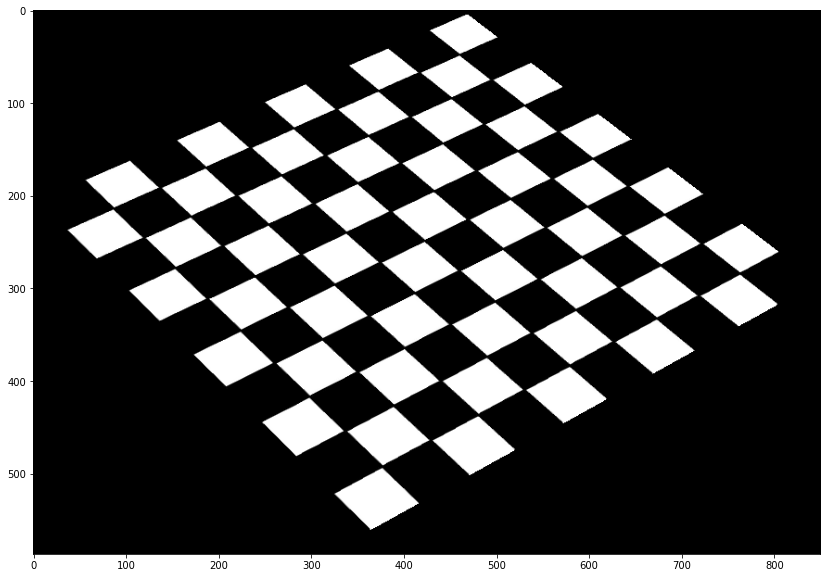

In [2]:
def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img
    i = 0
    while i < srcImg.shape[0]:
        j = 0
        while j < srcImg.shape[1]:
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[int(i)][int(j)]
            j+=0.1
        i+=0.1
    return persImg
#============================================

H1 = getHomography(srcImg_coord, replace_coord)
print('homography matrix from h1 to h2 is\n',H1)
persImg1 = getPerspective(srcImg, H1, dstImg)

plt.figure(figsize=(20,10))
plt.imshow(persImg1.astype('uint8'))
plt.show()


## 3.Compute the homography matrix from h2.jpg to h1.jpg, and show the homography matrix.

In [1]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])
        
def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img
    i = 0
    while i < srcImg.shape[0]:
        j = 0
        while j < srcImg.shape[1]:
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[int(i)][int(j)]
            j+=0.1
        i+=0.1
    return persImg

#========================================
print('start...')    
srcImg = cv2.imread('Img/h2.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/h1.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    # 当采集到四个点后，可以按esc退出鼠标采集行为
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

H2 = getHomography(srcImg_coord, replace_coord)
print('homography matrix from h2 to h1 is\n',H2)

start...
7, 207
366, 559
842, 293
469, 6
362, 363
362, 839
841, 361
843, 846
homography matrix from h2 to h1 is
 [[ 7.65227399e+00 -3.10598548e+00 -5.85023675e+02]
 [ 4.78333297e+00 -4.33301495e+00  1.47441590e+01]
 [ 8.42054663e-03 -7.27003260e-03  1.00000000e+00]]


## 4.Use the second homography matrix to tranform h2.jpg to h1.jpg, and show the result:

In [2]:
persImg2 = getPerspective(srcImg, H2, dstImg)
persImg2 = cv2.cvtColor(persImg2.astype('float32'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,10))
plt.imshow(persImg2.astype('uint8'))
plt.show()

IndexError: index -1202 is out of bounds for axis 0 with size 1200

## 5.Ask the user to select the points for transforming the simpsons image to the advertisement area of the bus. Compute the homography, transform the image, and show the transformation result

start...
2, 0
5, 1489
998, 7
998, 1491
583, 207
596, 517
798, 230
809, 464
srcImg_coord = [[0, 2], [1489, 5], [7, 998], [1491, 998]]
replace_coord = [[207, 583], [517, 596], [230, 798], [464, 809]]
homography matrix is
 [[ 2.04560303e-01  9.53110078e-02  2.06941955e+02]
 [ 3.66574270e-03  4.71480005e-01  5.82430432e+02]
 [-7.55898168e-06  3.20233652e-04  1.00000000e+00]]


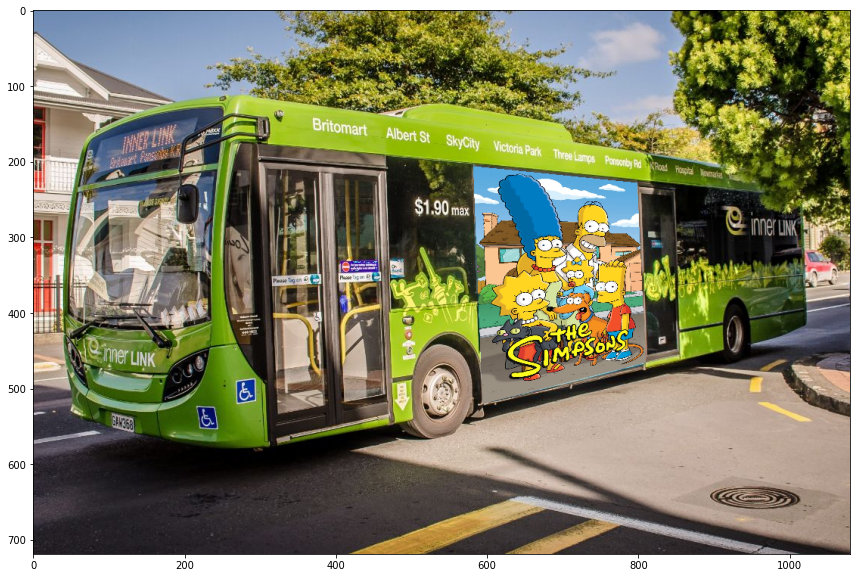

In [5]:
#delete all variables
%reset -f

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import linalg

def mouse_action_src(event, x, y, flags, srcImg_coord):
    cv2.imshow('srcImg coord', srcImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(srcImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        srcImg_coord.append([y, x])

def mouse_action_replace(event, x, y, flags, replace_coord):
    cv2.imshow('replace coord', dstImg_copy)
    if event == cv2.EVENT_LBUTTONUP:

        cv2.circle(dstImg_copy, (x, y), 5, (0, 0, 255), -1)

        print(f'{x}, {y}')
        replace_coord.append([y, x])

def getHomography(srcImg_coord, replace_coord):
    if srcImg_coord.shape != replace_coord.shape:
        raise RuntimeError('number of points do not match, please choose 4 points')

    n = srcImg_coord.shape[0]
    A = np.zeros((2*n,9))
    for i in range(0,n):
        A[2*i] = [srcImg_coord[i][0],srcImg_coord[i][1],1,0,0,0,
                  -replace_coord[i][0]*srcImg_coord[i][0],-replace_coord[i][0]*srcImg_coord[i][1],-replace_coord[i][0]]
        A[2*i+1] = [0,0,0,srcImg_coord[i][0],srcImg_coord[i][1],1,
                    -replace_coord[i][1]*srcImg_coord[i][0],-replace_coord[i][1]*srcImg_coord[i][1],-replace_coord[i][1]]
    U,S,V = linalg.svd(A) #SVD method
    H = V[8].reshape((3,3))
    
    return H / H[2,2]# uniformization

def getPerspective(srcImg, H, dstImg):
    persImg = np.zeros([dstImg.shape[0], dstImg.shape[1], dstImg.shape[2]])#define perspective img
    i = 0
    while i < srcImg.shape[0]:
        j = 0
        while j < srcImg.shape[1]:
            dst_x = (H[0][0]*i + H[0][1]*j + H[0][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            dst_y = (H[1][0]*i + H[1][1]*j + H[1][2]) / (H[2][0]*i + H[2][1]*j + H[2][2])
            if int(dst_x) < dstImg.shape[0] and int(dst_y) < dstImg.shape[1]:
                persImg[int(dst_x)][int(dst_y)] = srcImg[int(i)][int(j)]
            j+=0.1
        i+=0.1
    return persImg

#=================================
print('start...')    
srcImg = cv2.imread('Img/simpsons.jpg', cv2.IMREAD_COLOR)# upload source img
srcImg_copy = np.tile(srcImg, 1)

dstImg = cv2.imread('Img/bus.jpg', cv2.IMREAD_COLOR)# upload destination img
dstImg_copy = np.tile(dstImg, 1)

srcImg_coord = [] #define srcImg_coord coordinate points array [y,x]
cv2.namedWindow('srcImg coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('srcImg coord', mouse_action_src, srcImg_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

replace_coord = [] #define replace coordinate points array [y,x]
cv2.namedWindow('replace coord',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('replace coord', mouse_action_replace, replace_coord)
while True:
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()

print('srcImg_coord =', srcImg_coord)
print('replace_coord =', replace_coord)
srcImg_coord = np.array(srcImg_coord)
replace_coord = np.array(replace_coord)

H = getHomography(srcImg_coord, replace_coord)
print('homography matrix is\n',H)
persImg = getPerspective(srcImg, H, dstImg)

for i in range(0, dstImg.shape[0]):
    for j in range(0, dstImg.shape[1]):
        if all(persImg[i][j] == (0, 0, 0)):
            dstImg[i][j] = dstImg[i][j]
        else:
            dstImg[i][j] = persImg[i][j]

plt.figure(figsize=(20,10))
# plt.subplot(121)
# persImg = cv2.cvtColor(persImg, cv2.COLOR_BGR2RGB)
# plt.imshow(persImg.astype('uint8'))
# plt.subplot(122)
dstImg = cv2.cvtColor(dstImg, cv2.COLOR_BGR2RGB)
plt.imshow(dstImg.astype('uint8'))
plt.show()